# Expected delivery times

In this notebook, we calculate the expected delivery time of an optimal policy for different parameter combinations.

The figures produced in this notebook are used in our paper ([arXiv:2207.06533](https://arxiv.org/abs/2207.06533)).

In [1]:
# General
import numpy as np
import os
from tqdm.notebook import tqdm as tqdmn
import importlib as imp
import main as main

# Plots
import matplotlib.pyplot as plt

# Dark background?
dark = False
if dark==True:
    plt.style.use('dark_background')
else:
    plt.style.use('default')
    
# Latex
from matplotlib import rc
rc('text', usetex=True)
plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

# Create figures directory if necessary
try:
    os.mkdir('MANUSCRIPT_figs')
except FileExistsError:
    pass

# Save figures in the notebook with decent quality
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

<br/>

<br/>


---

# $n=3$

For $n=3$, $p<1$, $p_\mathrm{s}=1$, $t_\text{cut}=2$, the expected delivery time of the optimal policy is given by $\frac{2p^3 - 6p^2 + 4p + 1}{2p^4 - 6p^3 + 5p^2}$. This agrees with the plot below, although we do not show it in the figure.

In [2]:
### PARAMETERS ###
n = 3
p_s_array = [0.5,1]
cutoff_array = [2,5,10]
p_array = np.concatenate((np.arange(0.14,0.4,0.02),
                          np.arange(0.4,1.01,0.05)))

# Numerical
algorithm = 'valueiter' # valueiter or policyiter
tolerance = 1e-7
randomseed = 2

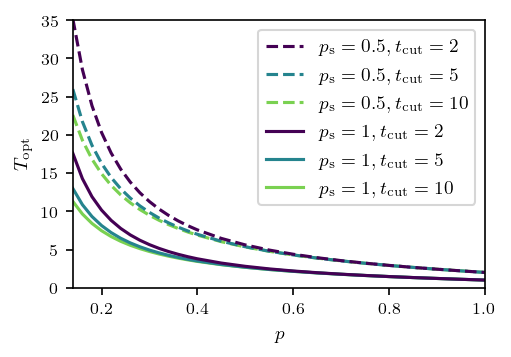

In [3]:
### SHOW RESULTS ###
x_cm = 9
y_cm = 6
fontsizes = 9
fontsizes_ticks = fontsizes-1
fig, ax = plt.subplots(figsize=(x_cm/2.54, y_cm/2.54))

cmap = plt.cm.get_cmap('viridis')
colors = [cmap(0), cmap(0.45), cmap(0.8)]
linestyles = ['--','-']
for i, p_s in enumerate(p_s_array):
    for j, cutoff in enumerate(cutoff_array):
        T_array = []
        for p in p_array:
            if algorithm == 'valueiter':
                data_valueiter = main.load_valueiter_data(n, p, p_s, cutoff, tolerance, randomseed)
                T_array += [data_valueiter['values'][0]]
            elif algorithm == 'policyiter':
                _, state_info, _ = main.load_policyiter_data(n, p, p_s, cutoff, tolerance)
                T_array += [-(state_info[0]['value']+1)]
            else:
                raise ValueError('Unknown algorithm')

        plt.plot(p_array, T_array, label=r'$p_\mathrm{s} = %s, t_\mathrm{cut} = %s$'%(p_s, cutoff),
                 linestyle=linestyles[i],color=colors[j], zorder=-j)
    
plt.xlim(0.14,1)
plt.ylim(0,35)

plt.xlabel(r'$p$', fontsize=fontsizes)
plt.ylabel(r'$T_\mathrm{opt}$', fontsize=fontsizes)

ax.tick_params(labelsize=fontsizes_ticks)
plt.legend(fontsize=fontsizes)

## Save file ##
filename = 'MANUSCRIPT_figs/delivery-time_n%d_tol%s.pdf'%(n,tolerance)
plt.savefig(filename, dpi=300, bbox_inches='tight')

<br/>

<br/>


---

# $n=4$

In [4]:
### PARAMETERS ###
n = 4
p_s_array = [0.5,1]
cutoff_array = [2,5,10]
p_array = np.concatenate((np.arange(0.14,0.4,0.02),
                          np.arange(0.4,1.01,0.05)))

# Numerical
algorithm = 'valueiter' # valueiter or policyiter
tolerance = 1e-7
randomseed = 2

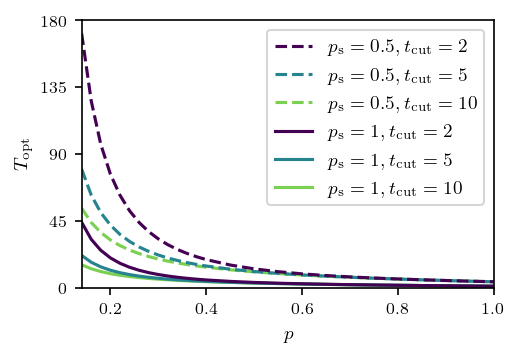

In [5]:
### SHOW RESULTS ###
x_cm = 9
y_cm = 6
fontsizes = 9
fontsizes_ticks = fontsizes-1
fig, ax = plt.subplots(figsize=(x_cm/2.54, y_cm/2.54))

cmap = plt.cm.get_cmap('viridis')
colors = [cmap(0), cmap(0.45), cmap(0.8)]
linestyles = ['--','-']
for i, p_s in enumerate(p_s_array):
    for j, cutoff in enumerate(cutoff_array):
        T_array = []
        for p in p_array:
            if algorithm == 'valueiter':
                data_valueiter = main.load_valueiter_data(n, p, p_s, cutoff, tolerance, randomseed)
                T_array += [data_valueiter['values'][0]]
            elif algorithm == 'policyiter':
                _, state_info, _ = main.load_policyiter_data(n, p, p_s, cutoff, tolerance)
                T_array += [-(state_info[0]['value']+1)]

        plt.plot(p_array, T_array, label=r'$p_\mathrm{s} = %s, t_\mathrm{cut} = %s$'%(p_s, cutoff),
                 linestyle=linestyles[i],color=colors[j], zorder=-j)
    
plt.xlim(0.14,1)
plt.ylim(0,180)
ax.set_yticks(np.linspace(0,180,5))

plt.xlabel(r'$p$', fontsize=fontsizes)
plt.ylabel(r'$T_\mathrm{opt}$', fontsize=fontsizes)

ax.tick_params(labelsize=fontsizes_ticks)
plt.legend(fontsize=fontsizes)

## Save file ##
filename = 'MANUSCRIPT_figs/delivery-time_n%d_tol%s.pdf'%(n,tolerance)
plt.savefig(filename, dpi=300, bbox_inches='tight')

<br/>

<br/>


---

# $n=5$

In [6]:
### PARAMETERS ###
n = 5
p_s_array = [0.5,1]
cutoff_array = [2,5,10]
p_array = np.concatenate((np.arange(0.14,0.4,0.02),
                          np.arange(0.4,1.01,0.05)))

# Numerical
algorithm = 'valueiter' # valueiter or policyiter
tolerance = 1e-7
randomseed = 2

In [7]:
### CALCULATE RESULTS ###
T_array = [[[],[],[]],[[],[],[]]]
for i, p_s in enumerate(p_s_array):
    for j, cutoff in enumerate(cutoff_array):
        for p in p_array:
            if algorithm == 'valueiter':
                data_valueiter = main.load_valueiter_data(n, p, p_s, cutoff, tolerance, randomseed)
                T_array[i][j] += [data_valueiter['values'][0]]
            elif algorithm == 'policyiter':
                _, state_info, _ = main.load_policyiter_data(n, p, p_s, cutoff, tolerance)
                T_array[i][j] += [-(state_info[0]['value']+1)]

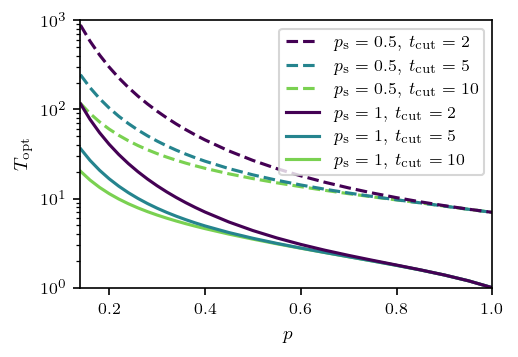

In [8]:
### SHOW RESULTS ###
x_cm = 9
y_cm = 6
fontsizes = 9
fontsizes_ticks = fontsizes-1
fig, ax = plt.subplots(figsize=(x_cm/2.54, y_cm/2.54))


cmap = plt.cm.get_cmap('viridis')
if dark==True:
    colors = [cmap(0.3), cmap(0.7), cmap(0.99)]
else:
    colors = [cmap(0), cmap(0.45), cmap(0.8)]
linestyles = ['--','-']
for i, p_s in enumerate(p_s_array):
    for j, cutoff in enumerate(cutoff_array):
        plt.plot(p_array, T_array[i][j], 
                 label=r'$p_\mathrm{s} = %s,\; t_\mathrm{cut} = %s$'%(p_s, cutoff),
                 linestyle=linestyles[i],color=colors[j], zorder=-j)
        
plt.xlim(0.14,1)
plt.ylim(1,1000)

plt.xlabel(r'$p$', fontsize=fontsizes)
plt.ylabel(r'$T_\mathrm{opt}$', fontsize=fontsizes)

ax.tick_params(labelsize=fontsizes_ticks)
plt.legend(fontsize=fontsizes-1)

plt.yscale('log')

## Save file ##
#plt.show()
if dark==True:
    filename = 'MANUSCRIPT_figs/DARK_delivery-time_n%d_tol%s.pdf'%(n,tolerance)
else:
    filename = 'MANUSCRIPT_figs/delivery-time_n%d_tol%s.pdf'%(n,tolerance)
plt.savefig(filename, dpi=300, bbox_inches='tight')